# Part 1

## Part 1.a: Write and call a function that downloads the contents of all URLs (please note that the URLs provided are in UTF-8 encoding) in the resource file (Wikipedia articles on common diseases) one by one to a local directory. Afterwards, this local directory should contain 233 HTML-files.

In [186]:
# Required imports
import requests as r
from os import path

In [199]:
# Function to download HTMLs
def html_downloader(filename:str):

    # Open data from txt file
    links = open(filename, 'r')
    count = 0
    # Loop through each line of the text file
    for line in links:
        # Extract html from the internet
        file = r.get(line.strip())

        # Check if request worked, if not, print warning, if yes, create downloaded data into html
        if file.status_code == 404:
            print(file.status_code, "Unable to extract html for ", line)
        else:
            linet = line.strip().replace("https://en.wikipedia.org/wiki/","").replace("/","and")
            open(f'./Wikipedia articles on common diseases/{linet}.html', 'wb').write(file.content)
  
    # Close txt file
    links.close()

In [ ]:
# Call function to perform download of htmls
html_downloader('wiki_233_diseases_sorted_urls.txt')

## Part 1.b: Using the library BeautifulSoup, extract from each downloaded HTML-file its:
- title
- main text found under the element <div id="bodyContent" ...>
- JSON-LD formatted metadata (if existing):
    1. name
    2. url
    3. datePublished
    4. dateModified
    5. headline
    
Store this data for each file in a dictionary and add this dictionary to a list. This list should then contain 233 dictionaries.

## Part 1.c: At the same time, create a string that contains the main text of all the wikipedia articles. To do that, you can concatenate the individual main texts extracted in the previous step (leave a whitespace between each text). Finally, save the content of this string in a local text file.

In [200]:
# Import required BeautifulSoup library and os library to navigate folder
from bs4 import BeautifulSoup
import os
import re
import json

In [201]:
# Function to extract the data from each html
directory = "./Wikipedia articles on common diseases"
# Create list that contains the 233 dictionaries to be created
htmls = []
# Create main string storage variable for step 1.c
main_text = ''

In [204]:
# Go through each file in the directory
list_dir = os.listdir(directory)
list_dir.remove('.DS_Store')
for filename in list_dir:
    if filename.endswith('.html'):
        # Create temp dictionary
        temp = {}
        # Get path for file to access and apply BS4 to get info from html
        fpath = os.path.join(directory, filename)
        with open(fpath) as f:
            soup = BeautifulSoup(f)

        temp['title'] = soup.title.text

        body = soup.select_one("#bodyContent")
        st = "\n".join([elem.text.strip() for elem in body])
        # IF NEEDED: Create space between erroneously concatenated sentences within div and store as main text
        # st = "\n".join([re.sub(r"([a-z0-9])([A-Z])", r"\1. \2", elem.text.strip()) for elem in body]) # It takes too long
        st = re.sub('\n', ' ', st) # Removes new lines
        temp['text'] = st

        # Concatenate main text with all others into main_text string variable
        main_text = main_text + ' ' + st

        # json-ld extraction
        j = soup.find("script", type="application/ld+json")
        if j:
            ld = json.loads(j.string)
            keys = ['name', 'url', 'datePublished', 'dateModified', 'headline']
            for key in keys:
                if key not in ld.keys():
                    keys.remove(key)

            # json-ld data saving
            for key in keys:
                temp[key] = ld[key]

    htmls.append(temp)

In [206]:
# Step 1.c - Store main_text full string into txt file
with open('main_text.txt', 'w', encoding='utf-8') as f:
    f.write(main_text)

In [207]:
# Check design of dictionary and amount in list    
print(len(htmls))

for elem in htmls[0]:
    print(elem, ": ", htmls[0][elem])

233
title :  Ulcerative colitis - Wikipedia
text :   From Wikipedia, the free encyclopedia    Inflammatory bowel disease that causes ulcers in the colon   Medical conditionUlcerative colitisEndoscopic image of a colon affected by ulcerative colitis. The internal surface of the colon is blotchy and broken in places. Mild-moderate disease.SpecialtyGastroenterologySymptomsAbdominal pain, diarrhea mixed with blood, weight loss, fever, anemia,[1] dehydration, loss of appetite, fatigue, sores on the skin, urgency to defecate, inability to defecate despite urgency, rectal pain[2]ComplicationsMegacolon, inflammation of the eye, joints, or liver, colon cancer[1][3]Usual onset15–30 years or > 60 years[1]DurationLong term[1]CausesUnknown[1]Diagnostic methodColonoscopy with tissue biopsies[1]Differential diagnosisDysentery, Crohn's disease, ischemic colitis[4]TreatmentDietary changes, medication, surgery[1]MedicationSulfasalazine, mesalazine, steroids, immunosuppressants such as azathioprine, biol

## Part 1.d: Create a pandas dataframe (e.g. named 'articles') from the list obtained in step 1b, and set its index to the article's title. Output this dataframe. Which Wikipedia articles do not provide "dateModified" information in their JSON-LD formatted metadata? (You can use a Documentation cell in Jupyter notebook to provide your answer).

In [18]:
# imports
import pandas as pd

In [208]:
# Step 1.d - Create df from data in list
articles = pd.DataFrame(htmls)
# Step 1.d - Set index to titles column
articles = articles.set_index('title')
articles

,text,name,url,datePublished,dateModified,headline
title,,,,,,
Ulcerative colitis - Wikipedia,"From Wikipedia, the free encyclopedia Infl...",Ulcerative colitis,https://en.wikipedia.org/wiki/Ulcerative_colitis,2002-07-22T21:34:48Z,2023-06-10T04:30:23Z,inflammatory bowel disease that causes ulcers ...
Gastritis - Wikipedia,"From Wikipedia, the free encyclopedia Stom...",Gastritis,https://en.wikipedia.org/wiki/Gastritis,2004-09-20T19:36:44Z,2023-06-21T05:54:05Z,stomach disease that is an inflammation of the...
Cardiovascular disease - Wikipedia,"From Wikipedia, the free encyclopedia Clas...",Cardiovascular disease,https://en.wikipedia.org/wiki/Cardiovascular_d...,2004-03-08T12:13:45Z,2023-06-15T19:08:48Z,class of diseases that involve the heart or bl...
ALS - Wikipedia,"From Wikipedia, the free encyclopedia (Redir...",ALS,https://en.wikipedia.org/wiki/ALS,2003-01-28T09:18:07Z,2023-06-27T20:06:21Z,rare neurodegenerative disease
Diarrhea - Wikipedia,"From Wikipedia, the free encyclopedia Loos...",Diarrhea,https://en.wikipedia.org/wiki/Diarrhea,2002-05-28T16:49:51Z,2023-04-02T16:08:51Z,loose or liquid bowel movements
...,...,...,...,...,...,...
Common cold - Wikipedia,"From Wikipedia, the free encyclopedia Comm...",Common cold,https://en.wikipedia.org/wiki/Common_cold,2002-09-27T01:22:23Z,2023-06-18T01:12:28Z,common viral infection of upper respiratory tract
HIV/AIDS - Wikipedia,"From Wikipedia, the free encyclopedia Spec...",HIV/AIDS,https://en.wikipedia.org/wiki/HIV/AIDS,2001-11-07T20:27:36Z,2023-06-24T07:15:01Z,spectrum of conditions caused by HIV infection
Methicillin-resistant Staphylococcus aureus - Wikipedia,"From Wikipedia, the free encyclopedia Bact...",Methicillin-resistant Staphylococcus aureus,https://en.wikipedia.org/wiki/Methicillin-resi...,2003-03-06T19:48:57Z,2023-06-24T16:35:53Z,bacterium responsible for difficult-to-treat i...


In [209]:
# Check for how many articles don't provide a "dateModified" info
not_dm = articles.loc[articles['dateModified'].isnull()]
not_dm

,text,name,url,datePublished,dateModified,headline
title,,,,,,
Breast cancer - Wikipedia,"From Wikipedia, the free encyclopedia This i...",Breast cancer,https://en.wikipedia.org/wiki/Breast_cancer,2002-08-11T15:51:15Z,NaN,cancer that originates in the mammary gland
Diabetes - Wikipedia,"From Wikipedia, the free encyclopedia This i...",Diabetes,https://en.wikipedia.org/wiki/Diabetes,2001-08-15T16:18:33Z,NaN,group of metabolic disorders characterized by ...
Dementia - Wikipedia,"From Wikipedia, the free encyclopedia This i...",Dementia,https://en.wikipedia.org/wiki/Dementia,2002-02-08T22:59:11Z,NaN,long-term brain disorder causing personality c...


## Part 1.e: Sort the dataframe based on the length of the 'headline' column in ascending order, assign this sorted dataframe to another dataframe. Then select the first 5 rows from this dataframe. Output the selection.

In [210]:
# Create new df by using deep copy and then sort values based on headline's string length, then show 5 first rows
articles2 = articles.copy(deep=True).sort_values(by=['headline'], key=lambda x: x.str.len(), ascending=True)
articles2.head(5)

,text,name,url,datePublished,dateModified,headline
title,,,,,,
Meningism - Wikipedia,"From Wikipedia, the free encyclopedia Symp...",Meningism,https://en.wikipedia.org/wiki/Meningism,2005-01-01T22:07:16Z,2023-02-09T01:21:36Z,symptom
Venous ulcer - Wikipedia,"From Wikipedia, the free encyclopedia Medi...",Venous ulcer,https://en.wikipedia.org/wiki/Venous_ulcer,2005-11-09T16:33:30Z,2023-02-24T10:53:47Z,disease
Hepatomegaly - Wikipedia,"From Wikipedia, the free encyclopedia Medi...",Hepatomegaly,https://en.wikipedia.org/wiki/Hepatomegaly,2005-02-12T11:21:09Z,2023-06-03T18:54:27Z,symptom
Sleep paralysis - Wikipedia,"From Wikipedia, the free encyclopedia Slee...",Sleep paralysis,https://en.wikipedia.org/wiki/Sleep_paralysis,2003-05-29T15:39:17Z,2023-06-25T21:29:29Z,phenomenon
Periodontal disease - Wikipedia,"From Wikipedia, the free encyclopedia Medi...",Periodontal disease,https://en.wikipedia.org/wiki/Periodontal_disease,2002-10-23T20:23:59Z,2023-06-13T18:57:39Z,gum disease


## Part 1.f: Store the obtained "articles" pandas dataframe (set index_label to "title") in a local sqlite3 database.

In [211]:
# Import library
import sqlite3
# Store data through library function in a variable, then make it a database
sql = sqlite3.connect('wiki_articles.db')
articles.to_sql('wiki_articles', sql, index_label='title', if_exists='replace')

233

# Part 2: Extend the Jupyter notebook (in Python) created in 1, by providing solutions to the following tasks:

## Part 2.a: 
- Create an NLTK-corpus using PlaintextCorpusReader from the local text file created in 1c. 
- For the tokenization of sentences, please use the RegexpTokenizer with the pattern: *r'[^.!?]+'*.
- Using NLTK's method *words()*, output at most 200 words of the corpus together with their absolute frequency in descending order (regarding frequency). Note: this output might contain elements like punctuation marks and stop words.

In [212]:
# Imports
import nltk
from collections import Counter

In [213]:
# For the tokenization of sentences, please use the RegexpTokenizer with the pattern: *r'[^.!?]+'*.
tokenizer = nltk.RegexpTokenizer(r'[^.!?]+')

In [215]:
# Create an NLTK-corpus using PlaintextCorpusReader from the local text file created in 1c.
root = './' # Root directory where file is located
corp = nltk.corpus.PlaintextCorpusReader(root, 'main_text.txt',sent_tokenizer=tokenizer)

In [216]:
# Run corpus to tokenize word by word
words = corp.words()
# Use Counter to count frequency
c = Counter(words)
c.most_common(200)

[('.', 183102),
 (',', 133427),
 ('of', 67807),
 ('the', 63421),
 ('(', 57351),
 ('-', 53461),
 ('and', 51170),
 (']', 43841),
 ('in', 35517),
 (':', 34434),
 ('.[', 30758),
 ('a', 29016),
 ('to', 28967),
 ('"', 28391),
 ('^', 25939),
 (').', 23507),
 ('/', 21448),
 ('".', 20617),
 ('–', 20016),
 ('is', 19785),
 ('10', 19303),
 ('with', 18503),
 ('for', 15566),
 ('PMID', 15478),
 ('doi', 15218),
 ('):', 14947),
 ('The', 12947),
 ('or', 11873),
 ('from', 11751),
 (')', 11516),
 ('on', 10724),
 ('as', 10695),
 ('are', 10237),
 ('1', 9641),
 (';', 9316),
 ('that', 8588),
 ('be', 8451),
 ('A', 8449),
 ('[', 8417),
 ('][', 8237),
 ('by', 7731),
 ('disease', 7515),
 ("'", 7222),
 ('2', 7151),
 ('may', 6872),
 ('b', 6434),
 ('PMC', 6086),
 ('s', 6007),
 ('3', 5946),
 ('can', 5835),
 ('Retrieved', 5685),
 ('have', 5564),
 ('an', 5242),
 ('4', 5062),
 ('5', 4952),
 ('Archived', 4812),
 ('edit', 4809),
 ('not', 4623),
 ('original', 4602),
 ('In', 4555),
 ('S2CID', 4383),
 ('M', 4276),
 ('%', 418

## Part 2.b: Filter out the following elements from the word list obtained in the previous step:
- any stop words found in NLTK's English stop word corpus
- any elements that contain only one character
- any elements that do not contain the letters A-Z and a-z (Regular expression pattern: r'[^A-Za-z]')
- Output this filtered list of (at most 200) words together with their absolute frequency in descending order(regarding frequency). Also, count in a defaultdict how often a word occurs that is still present after filtering is complete

In [217]:
from collections import defaultdict

In [218]:
# Get set of english stopwords
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saraedwards/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [219]:
# Filter out stopwords from frequency df
# variable list for words after filter
pruned_words = []
# dictionary that starts all values with 0
allwords = defaultdict(lambda:0)
# Create list again but now with filtered elements through regex that excludes numbers
words = list(filter(None, [re.sub(r'[^A-Za-z]','', word) for word in corp.words()]))

# Navigate list and store frequency in list and dictionary
for k in words:
    if len(k) > 1 and k.lower() not in stopwords:
        pruned_words.append(k.lower())
        allwords[k.lower()] += 1

c = Counter(pruned_words)
c.most_common(200)

[('pmid', 15478),
 ('doi', 15261),
 ('disease', 9559),
 ('may', 9035),
 ('pmc', 6095),
 ('retrieved', 5770),
 ('cancer', 5063),
 ('treatment', 4864),
 ('archived', 4851),
 ('edit', 4809),
 ('people', 4729),
 ('original', 4606),
 ('journal', 4519),
 ('risk', 4465),
 ('scid', 4384),
 ('symptoms', 4187),
 ('syndrome', 4071),
 ('also', 3878),
 ('health', 3683),
 ('blood', 3375),
 ('review', 3262),
 ('disorder', 3182),
 ('clinical', 3173),
 ('medicine', 2859),
 ('al', 2841),
 ('systematic', 2761),
 ('disorders', 2736),
 ('infection', 2687),
 ('cause', 2676),
 ('et', 2651),
 ('cd', 2647),
 ('cases', 2634),
 ('children', 2579),
 ('isbn', 2560),
 ('diagnosis', 2440),
 ('common', 2429),
 ('march', 2390),
 ('associated', 2304),
 ('one', 2300),
 ('january', 2287),
 ('american', 2267),
 ('virus', 2261),
 ('medical', 2235),
 ('therapy', 2222),
 ('december', 2220),
 ('february', 2202),
 ('june', 2199),
 ('used', 2192),
 ('use', 2184),
 ('october', 2174),
 ('cell', 2168),
 ('april', 2165),
 ('disease

In [220]:
allwords

defaultdict(<function __main__.<lambda>()>,
            {'wikipedia': 688,
             'free': 586,
             'encyclopedia': 381,
             'inflammatory': 656,
             'bowel': 350,
             'disease': 9559,
             'causes': 1658,
             'ulcers': 218,
             'colon': 264,
             'medical': 2235,
             'conditionulcerative': 1,
             'colitisendoscopic': 1,
             'image': 174,
             'affected': 987,
             'ulcerative': 261,
             'colitis': 299,
             'internal': 475,
             'surface': 217,
             'blotchy': 2,
             'broken': 48,
             'places': 73,
             'mild': 525,
             'moderate': 362,
             'specialtygastroenterologysymptomsabdominal': 1,
             'pain': 1966,
             'diarrhea': 366,
             'mixed': 147,
             'blood': 3375,
             'weight': 672,
             'loss': 1426,
             'fever': 1438,
             

## Part 2.c: Create and output a word cloud using the defaultdict obtained in 2b.

In [269]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

(-0.5, 799.5, 399.5, -0.5)

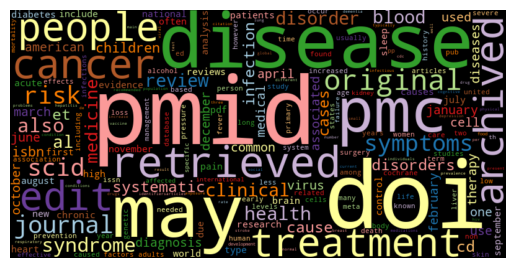

In [279]:
# Create wordcloud which also uses stop words as per the function wordcloud from file reviewed in class
wc = WordCloud(width=800, height=400, 
                background_color= "black", colormap="Paired", 
                max_font_size=150, max_words=200)

if stopwords is not None:
        c = {token:freq for (token, freq) in allwords.items() 
                              if token not in stopwords}

wc.generate_from_frequencies(c)
plt.title(None)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

# Part 3:

## Part 3.a: Prove that the database file from 1f has been properly loaded into a pandas dataframe by showing (output requested): 
- saved table exists
- pandas dataframe contains expected columns 'title', 'text', 'name', 'url', 'datePublished', 'dateModified', 'headline' as well as 233 rows for respective Wiki texts/docs

In [239]:
connect = sqlite3.connect('wiki_articles.db') # Connect to db
df = pd.read_sql_query("SELECT * from wiki_articles", connect) # SQL query to get all from db
connect.close()
print("Existing columns: ", df.columns.to_list())
print("length: ", len(df.text))
df # it exists

Existing columns:  ['title', 'text', 'name', 'url', 'datePublished', 'dateModified', 'headline']
length:  233


,title,text,name,url,datePublished,dateModified,headline
0,Ulcerative colitis - Wikipedia,"From Wikipedia, the free encyclopedia Infl...",Ulcerative colitis,https://en.wikipedia.org/wiki/Ulcerative_colitis,2002-07-22T21:34:48Z,2023-06-10T04:30:23Z,inflammatory bowel disease that causes ulcers ...
1,Gastritis - Wikipedia,"From Wikipedia, the free encyclopedia Stom...",Gastritis,https://en.wikipedia.org/wiki/Gastritis,2004-09-20T19:36:44Z,2023-06-21T05:54:05Z,stomach disease that is an inflammation of the...
2,Cardiovascular disease - Wikipedia,"From Wikipedia, the free encyclopedia Clas...",Cardiovascular disease,https://en.wikipedia.org/wiki/Cardiovascular_d...,2004-03-08T12:13:45Z,2023-06-15T19:08:48Z,class of diseases that involve the heart or bl...
3,ALS - Wikipedia,"From Wikipedia, the free encyclopedia (Redir...",ALS,https://en.wikipedia.org/wiki/ALS,2003-01-28T09:18:07Z,2023-06-27T20:06:21Z,rare neurodegenerative disease
4,Diarrhea - Wikipedia,"From Wikipedia, the free encyclopedia Loos...",Diarrhea,https://en.wikipedia.org/wiki/Diarrhea,2002-05-28T16:49:51Z,2023-04-02T16:08:51Z,loose or liquid bowel movements
...,...,...,...,...,...,...,...
228,Common cold - Wikipedia,"From Wikipedia, the free encyclopedia Comm...",Common cold,https://en.wikipedia.org/wiki/Common_cold,2002-09-27T01:22:23Z,2023-06-18T01:12:28Z,common viral infection of upper respiratory tract
229,HIV/AIDS - Wikipedia,"From Wikipedia, the free encyclopedia Spec...",HIV/AIDS,https://en.wikipedia.org/wiki/HIV/AIDS,2001-11-07T20:27:36Z,2023-06-24T07:15:01Z,spectrum of conditions caused by HIV infection
230,Methicillin-resistant Staphylococcus aureus - ...,"From Wikipedia, the free encyclopedia Bact...",Methicillin-resistant Staphylococcus aureus,https://en.wikipedia.org/wiki/Methicillin-resi...,2003-03-06T19:48:57Z,2023-06-24T16:35:53Z,bacterium responsible for difficult-to-treat i...
231,Kidney stone disease - Wikipedia,"From Wikipedia, the free encyclopedia Form...",Kidney stone disease,https://en.wikipedia.org/wiki/Kidney_stone_dis...,2002-02-09T21:51:59Z,2023-06-12T12:33:48Z,formation of mineral 'stones' in the urinary t...


## Part 3.b: Copy the three functions “tokenize()”, “remove_stop()”, and “prepare()” from the second lecture’s Jupyter notebook “Lecture_2_Textbook_Blueprints_TFIDF.ipynb” and create a simple pipeline (a list) consisting of the entries “str.lower”, “tokenize”, and “remove_stop”. Modify the copied function “tokenize()” such that it returns “re.findall(r'[A-Za-z]+', text)”.

In [258]:
# tokenize()
def tokenize(text):
    return re.findall(r'[A-Za-z]+', text)

In [229]:
# remove_stop()
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [225]:
# prepare() - this is applying the steps of the pipeline
def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [226]:
pipeline = [str.lower, tokenize, remove_stop]

## Part 3.c: Apply the function “prepare()” on the column “text” of the dataframe and add a new column called “tokens” to it.

In [232]:
from tqdm import tqdm
tqdm.pandas()

In [240]:
df['tokens'] = df['text'].progress_apply(prepare, pipeline=pipeline)

100%|██████████| 233/233 [00:01<00:00, 208.96it/s]


## Part 3.d: Apply the function “len()” on the column “tokens” of the dataframe and add a new column called “num_tokens” to it.

In [241]:
df['num_tokens'] = df['tokens'].progress_map(len)

100%|██████████| 233/233 [00:00<00:00, 351916.76it/s]


## Part 3.e: Show that the dataframe actually contains the two newly added columns by outputting two random rows.

In [243]:
df.sample(2, random_state=53)

,title,text,name,url,datePublished,dateModified,headline,tokens,num_tokens
206,Tuberculosis - Wikipedia,"From Wikipedia, the free encyclopedia Infe...",Tuberculosis,https://en.wikipedia.org/wiki/Tuberculosis,2001-09-29T21:43:27Z,2023-05-26T21:45:50Z,infectious disease caused by the bacterium Myc...,"[wikipedia, free, encyclopedia, infectious, di...",10282
50,Chickenpox - Wikipedia,"From Wikipedia, the free encyclopedia Huma...",Chickenpox,https://en.wikipedia.org/wiki/Chickenpox,2001-06-20T12:38:12Z,2023-06-24T10:26:30Z,human disease,"[wikipedia, free, encyclopedia, human, viral, ...",4349


## Part 3.f: Copy the function “count_words()” from the second lecture’s Jupyter notebook “Lecture_2_Textbook_Blueprints_TFIDF.ipynb” and create a new dataframe “freq_df” that is returned by calling “count_words()”. (Of course, “count_words()” must operate on the dataframe loaded in 3a).

In [246]:
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].progress_map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [264]:
# Create new df
freq_df = count_words(df)
freq_df

100%|██████████| 233/233 [00:00<00:00, 1804.13it/s]


,freq
token,
pmid,15478
doi,15261
disease,9471
may,9030
b,8396
...,...
hochman,2
augustine,2
gudmundsson,2


## Part 3.g: Copy the function “compute_idf()” from the second lecture’s Jupyter notebook “Lecture_2_Textbook_Blueprints_TFIDF.ipynb” and create a new dataframe “idf_df” that is returned by calling “compute_idf()”. (Of course, “compute_idf()” must operate on the dataframe loaded in 3a).

In [251]:
# Copied function - Inverse Document Frequency (IDF)
def compute_idf(df, column='tokens', preprocess=None, min_df=2):

    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    # count tokens
    counter = Counter()
    df[column].progress_map(update)

    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df') #document frequency (df), not dataframe df
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df

In [261]:
# Return idf
idf_df = compute_idf(df)
idf_df

  0%|          | 0/233 [00:00<?, ?it/s]

100%|██████████| 233/233 [00:00<00:00, 1847.90it/s]
/var/folders/tg/f26try5n4pq7thttks3b9fs00000gn/T/ipykernel_1016/848731845.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1


,df,idf
token,,
lesshaft,16,2.778450
jaundice,30,2.149841
lippincott,82,1.144319
testing,152,0.527158
experiencing,51,1.619213
...,...,...
tarrytown,2,4.857891
cavendish,3,4.452426
knoll,2,4.857891


## Part 3.h: Perform a column-wise combination of “freq_df” and “idf_df” using the available “join()” method.

In [265]:
freq_df = freq_df.join(idf_df)
freq_df

,freq,df,idf
token,,,
pmid,15478,232.0,0.104301
doi,15261,232.0,0.104301
disease,9471,232.0,0.104301
may,9030,233.0,0.100000
b,8396,229.0,0.117316
...,...,...,...
hochman,2,2.0,4.857891
augustine,2,2.0,4.857891
gudmundsson,2,2.0,4.857891


## Part 3.i: Calculate the term frequency-inverse document frequency (TF-IDF) values by multiplying the corresponding values in the “freq” and “idf” columns of the dataframe “freq_df” and assign the resulting values to a new column called “tfidf” in “freq_df”.

In [253]:
freq_df['tfidf'] = freq_df['freq'] * freq_df['idf']

## Part 3.j: Sort the dataframe “freq_df” based on the values in the “tfidf” column in descending order and output the first 10 rows from this sorted dataframe.

In [257]:
freq_df = freq_df.sort_values(by=['tfidf'], ascending=False)
freq_df.head(10)

,freq,df,idf,tfidf
token,,,,
cancer,5001,126.0,0.714757,3574.497490
virus,2210,92.0,1.029250,2274.642227
disorder,3173,138.0,0.623785,1979.269070
pmid,15478,232.0,0.104301,1614.372146
autism,791,34.0,2.024678,1601.520242
diabetes,1935,113.0,0.823651,1593.763978
doi,15261,232.0,0.104301,1591.738811
sleep,1611,96.0,0.986690,1589.558012
malaria,745,31.0,2.117051,1577.203181


## Part 3.k: Are these returned rows more meaningful than the first ten entries of the filtered list obtained from 2b? Please provide a brief explanation. (You can use a Documentation cell in your Jupyter notebook to provide your answers.)

Answer: 
I think they both are equally meaningful when it comes to their usefulness because the output from 2.b, which is the number of times a word appears in given text, is also required and calculated at step 3.f because it is needed to continue performing the tf-idf ouput from part 3. So, overall, 2.b results are necessary still and they are the same at this point comparison.

The only thing is tf-idf calculated values in part 3 are meant to help calculate the weights assigned to terms by taking into consideration the number of documents used for the calculations, thus helping give more value to terms with low frequencies that may indeed be of significance because they appear often in the corpora documentation.